# Préparation des données

In [1]:
import pandas as pd
%pylab inline
import missingno as mso
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Import

In [2]:
# Permet de visualiser toutes les colonnes sur pandas
pd.set_option('display.max_columns', None)

### Année 2015

In [3]:
df2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
df2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [4]:
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [5]:
df2015.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,1559.000000,560.000000,2560.000000,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,27675.646568,10755.708929,67.894141,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,52480.843425,22618.529737,27.154057,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,4959.000000,2385.250000,51.750000,27.300000,29.700000,73.500000,80.300000,9.139300e+05,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,10600.000000,5019.500000,76.000000,37.400000,40.900000,95.000000,102.800000,1.776219e+06,1.953996e+06,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000,18390.000000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,26224.500000,10275.000000,90.000000,59.875000,65.575000,143.900000,151.275000,4.044277e+06,4.368462e+06,0.000000e+00,8.061935e+05,2.750847e+06,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000,19576.000000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,686750.000000,303910.000000,100.000000,800.600000,800.600000,2511.100000,2511.000000,2.958126e+08,2.977410e+08,1.278697e+08,8.344505e+07,2.847263e+08,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,135.000000,61.000000,2.000000,51.000000,19584.000000


### Année 2016

In [6]:
df2016 = pd.read_csv('2016-building-energy-benchmarking.csv')
df2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [7]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [8]:
df2016.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [9]:
# Le reste de l'analyse sur portera sur les données de l'année 2016
df = df2016.copy()

In [10]:
# Nombre d'informations en communs

len(set(df2016.OSEBuildingID).intersection(set(df2015.OSEBuildingID)))



3284

## Variables catégorielles

In [11]:
# Variables potentiellement intéressantes
for col in df.select_dtypes('object').columns:
    print('Unique values - ' + col + ': ' + str(len(df[col].unique())) + '\n % de remplissage : ' +str( round(1 - df[col].isna().sum() / len(df), 2)) + '\n' )

Unique values - BuildingType: 8
 % de remplissage : 1.0

Unique values - PrimaryPropertyType: 24
 % de remplissage : 1.0

Unique values - PropertyName: 3362
 % de remplissage : 1.0

Unique values - Address: 3354
 % de remplissage : 1.0

Unique values - City: 1
 % de remplissage : 1.0

Unique values - State: 1
 % de remplissage : 1.0

Unique values - TaxParcelIdentificationNumber: 3268
 % de remplissage : 1.0

Unique values - Neighborhood: 19
 % de remplissage : 1.0

Unique values - ListOfAllPropertyUseTypes: 467
 % de remplissage : 1.0

Unique values - LargestPropertyUseType: 57
 % de remplissage : 0.99

Unique values - SecondLargestPropertyUseType: 51
 % de remplissage : 0.5

Unique values - ThirdLargestPropertyUseType: 45
 % de remplissage : 0.18

Unique values - YearsENERGYSTARCertified: 66
 % de remplissage : 0.04

Unique values - ComplianceStatus: 4
 % de remplissage : 1.0

Unique values - Outlier: 3
 % de remplissage : 0.01



Parmi les variables précédentes, je sélectionne les variables avec un taux de remplissage élevé et une cardinalité faible :

In [12]:
col_cat = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'ComplianceStatus', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']

### Nettoyage

In [13]:
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].replace('Restaurant\n', 'Restaurant')

df['Neighborhood'] = df['Neighborhood'].str.upper()
df['Neighborhood'] = df['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE')

In [14]:
df['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

### Occurences par variables

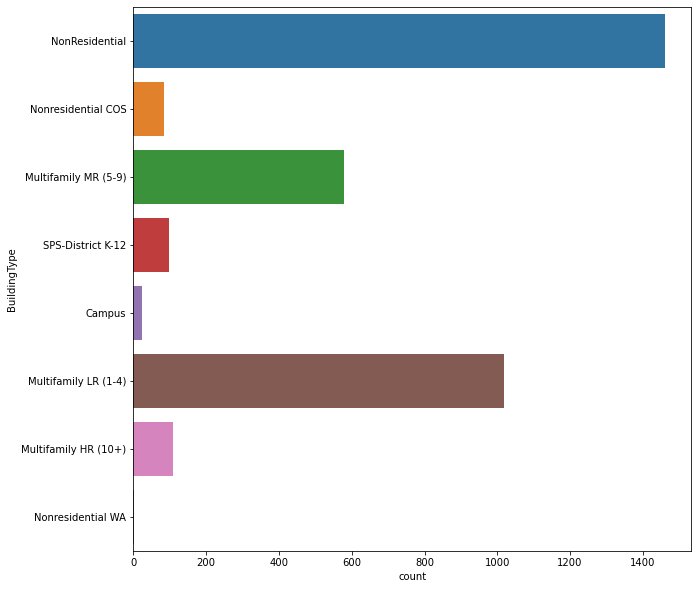

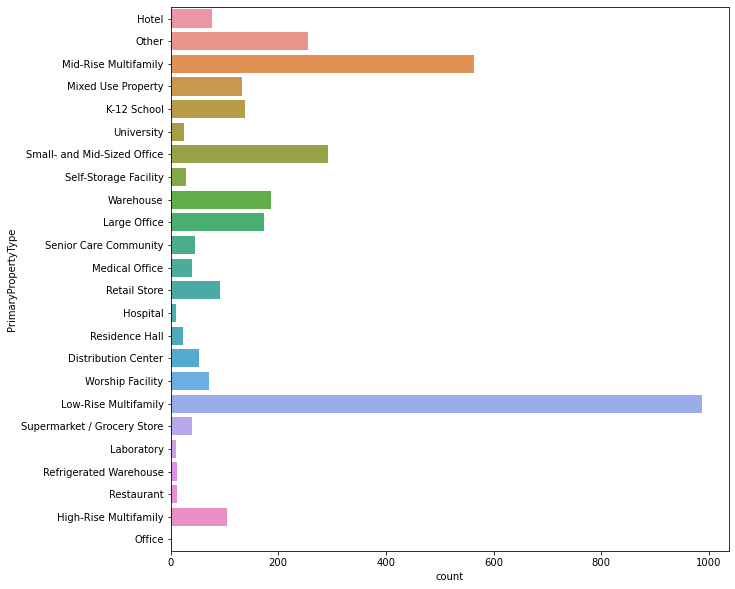

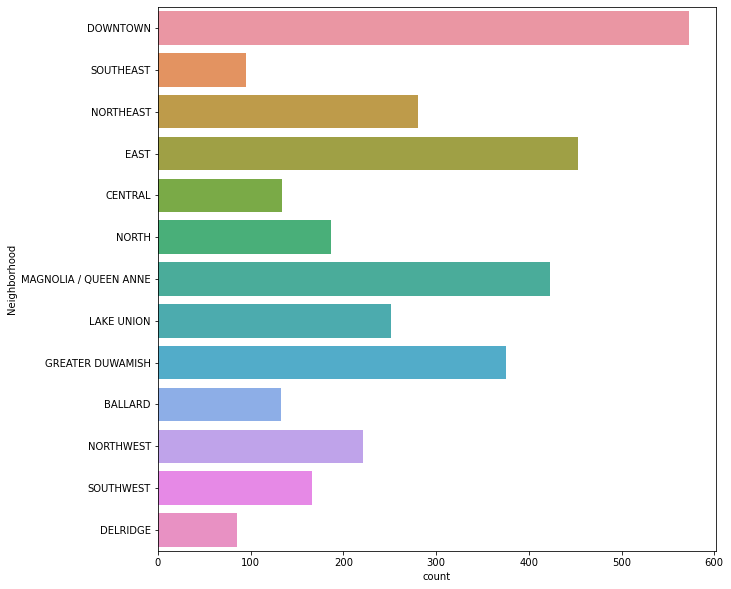

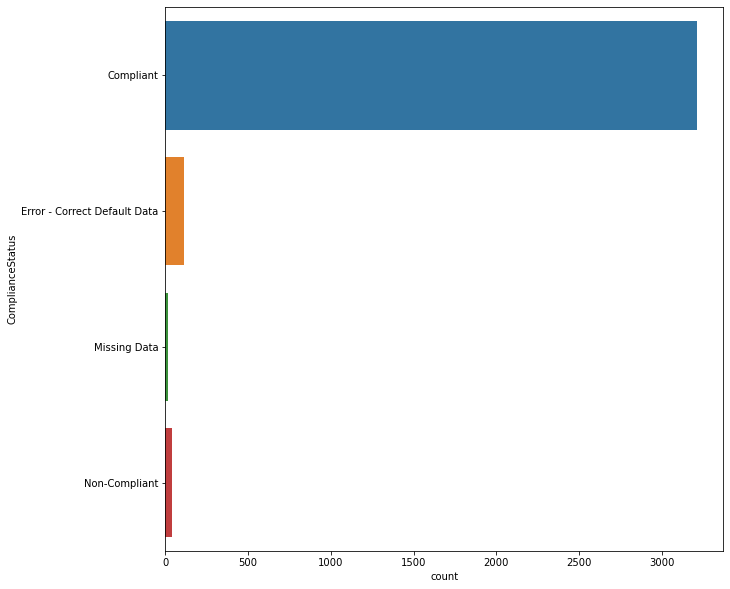

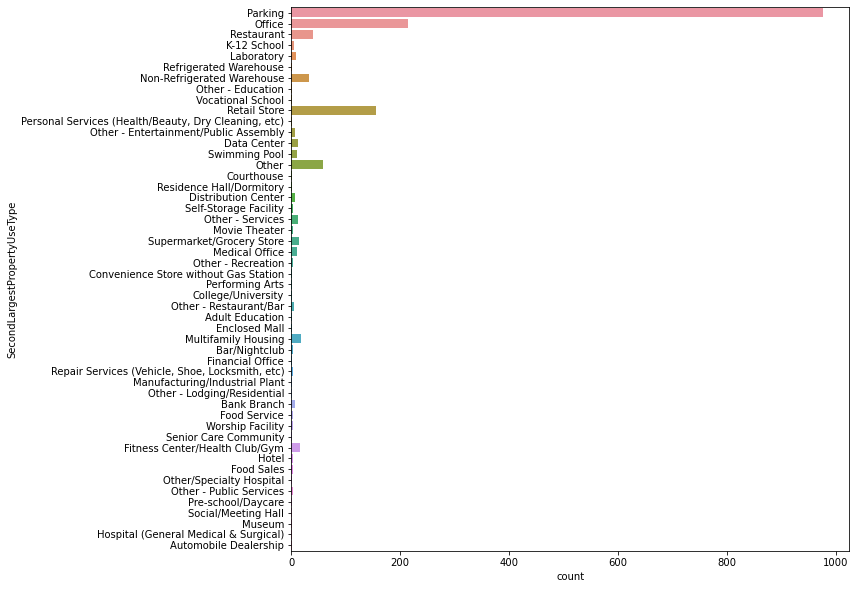

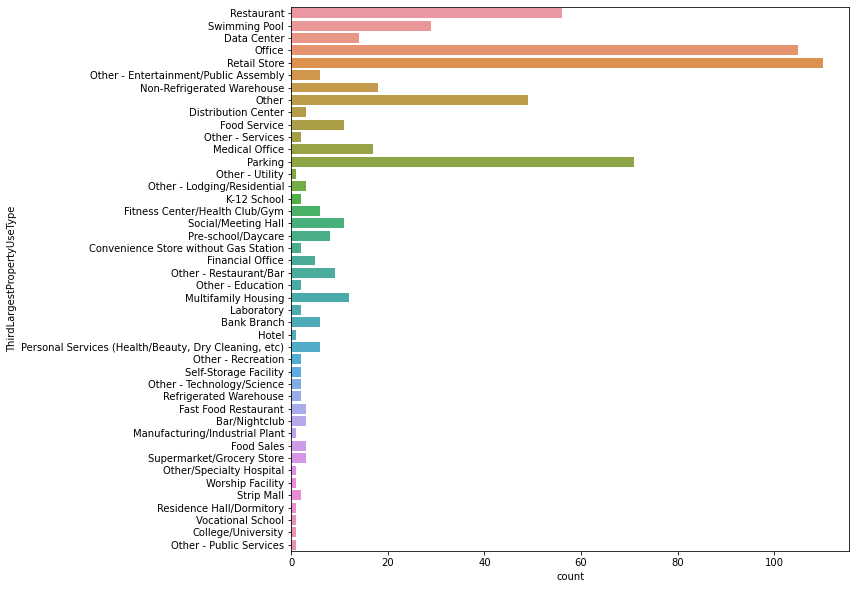

In [15]:
for col in col_cat:
    fig, ax = plt.subplots()
    fig.set_size_inches((10,10))
    ax = sns.countplot(data=df, y=col, orient='h' )
    plt.show()

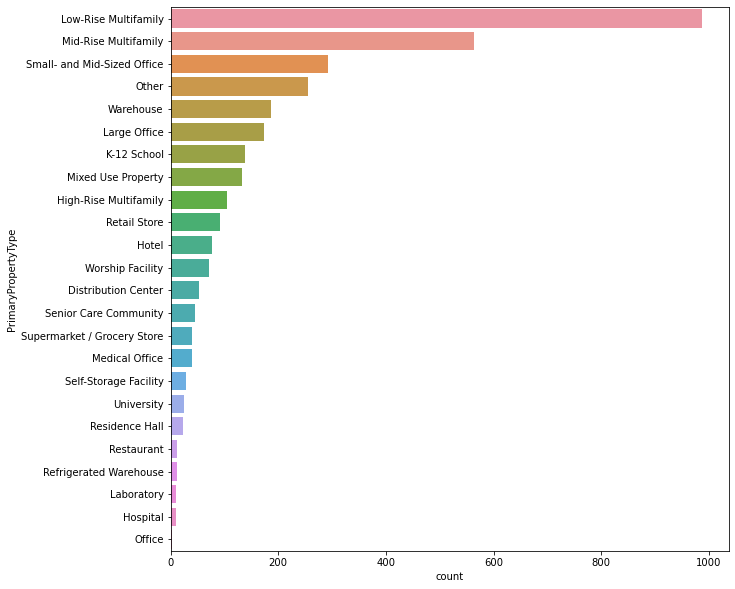

In [16]:
order = df['PrimaryPropertyType'].value_counts().index

fig, ax = plt.subplots()
fig.set_size_inches((10,10))
ax = sns.countplot(data=df, y='PrimaryPropertyType', orient='h' , order=order)
plt.show()

### Restriction aux habitations uniquement non-résidentielles

In [17]:
mask_non_res = df.BuildingType.isin(['NonResidential', 'Nonresidential COS', 'Nonresidential WA'])
df = df[mask_non_res]

### Distribution de la variable SiteEUIWN(kBtu/sf) en fonction du type de propriété

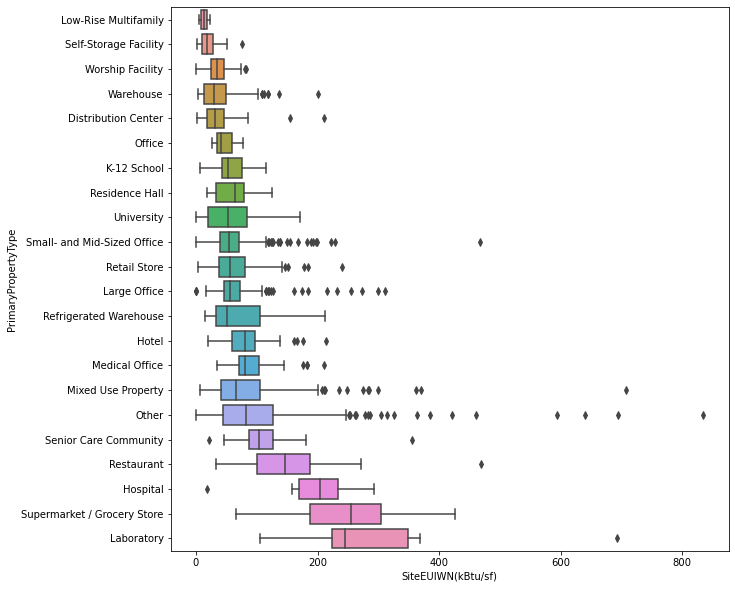

In [18]:
order = df.groupby('PrimaryPropertyType')['SiteEUIWN(kBtu/sf)'].mean().sort_values().index

fig, ax = plt.subplots()
fig.set_size_inches((10,10))
ax = sns.boxplot(data=df, y='PrimaryPropertyType', x='SiteEUIWN(kBtu/sf)', order=order )
plt.show()

In [19]:
index = df[df.PrimaryPropertyType == 'Low-Rise Multifamily'].index
df = df.drop(index= index, axis=1)

### Regroupement des occurences peu fréquentes et avec une distribution similaire

In [20]:
office = ['Small- and Mid-Sized Office', 'Large Office', 'Office']
warehouse = ['Non-Refrigerated Warehouse', 'Warehouse']
hosp_lab = ['Hospital', 'Laboratory']

df['PrimaryPropertyType'] = df.PrimaryPropertyType.replace(
    to_replace = office,
    value='Office'
)

df['PrimaryPropertyType'] = df.PrimaryPropertyType.replace(
    to_replace = warehouse,
    value='Warehouse'
)

df['PrimaryPropertyType'] = df.PrimaryPropertyType.replace(
    to_replace = hosp_lab,
    value='HospitalAndLaboraty'
)    

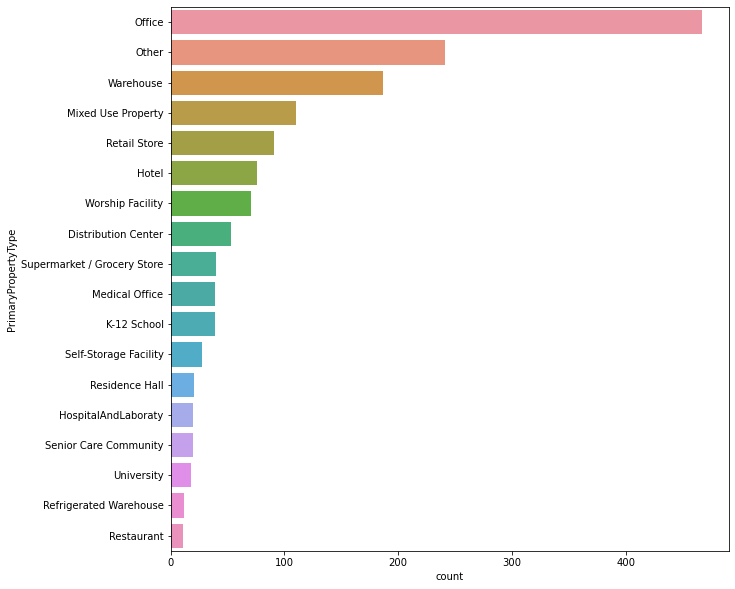

In [21]:
order = df['PrimaryPropertyType'].value_counts().index

fig, ax = plt.subplots()
fig.set_size_inches((10,10))
ax = sns.countplot(data=df, y='PrimaryPropertyType', orient='h' , order=order)
plt.show()

## Sélection des variables

In [22]:
declarative_col = ['OSEBuildingID', 'YearBuilt', 'BuildingType', 'NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'PrimaryPropertyType', 
                   'PropertyGFABuilding(s)', 'Neighborhood', 'Latitude', 'Longitude', 'ComplianceStatus']


leak = ['SourceEUI(kBtu/sf)', 'SiteEUI(kBtu/sf)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']

target_1 = ['TotalGHGEmissions']
target_2 = ['SiteEnergyUse(kBtu)']
df1 = df[declarative_col + leak + target_1 + target_2]

## Valeurs manquantes

<AxesSubplot:>

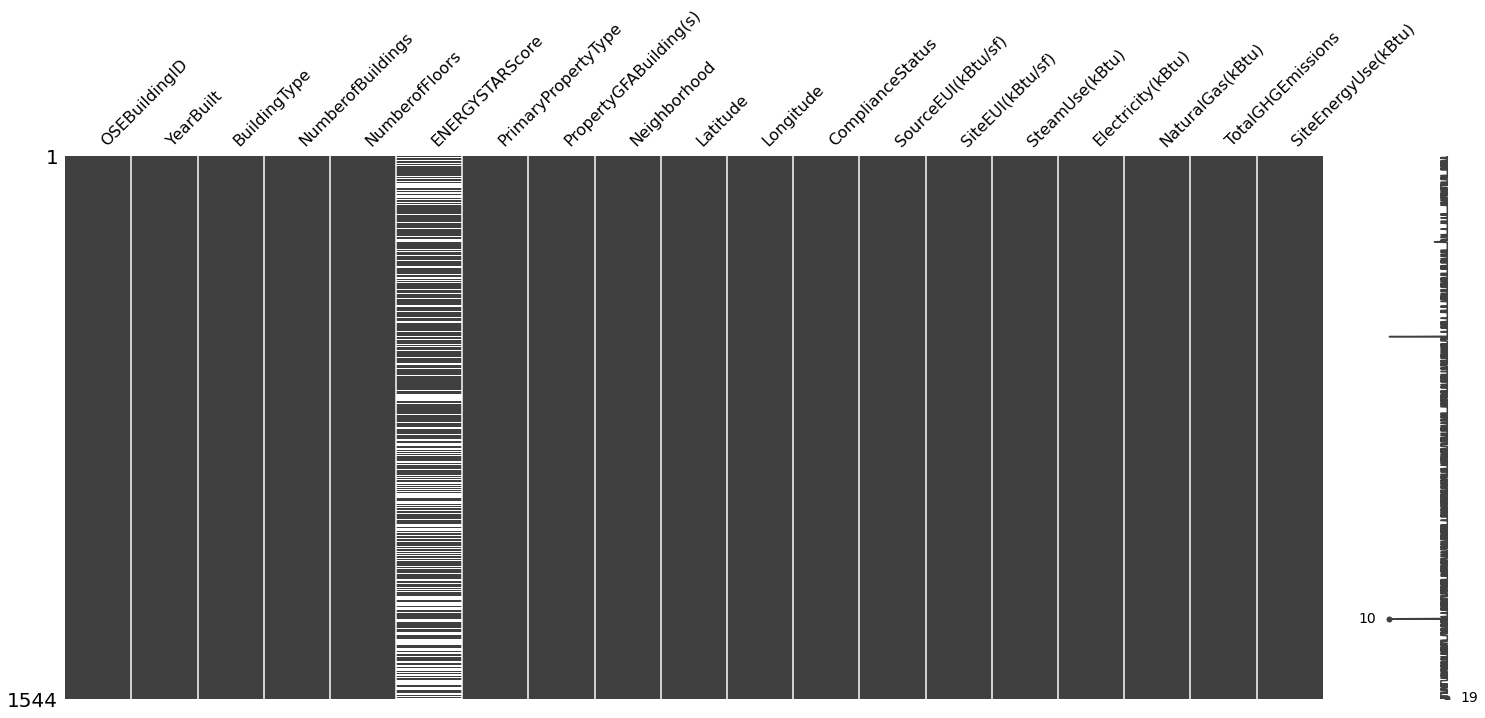

In [23]:
mso.matrix(df1)

In [24]:
df1['PrimaryPropertyType'] = df1.PrimaryPropertyType.astype('category')
df1['Neighborhood'] = df1.Neighborhood.astype('category')

<ipython-input-24-6eeed6605c03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PrimaryPropertyType'] = df1.PrimaryPropertyType.astype('category')
<ipython-input-24-6eeed6605c03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Neighborhood'] = df1.Neighborhood.astype('category')


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 3375
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   OSEBuildingID           1544 non-null   int64   
 1   YearBuilt               1544 non-null   int64   
 2   BuildingType            1544 non-null   object  
 3   NumberofBuildings       1542 non-null   float64 
 4   NumberofFloors          1544 non-null   int64   
 5   ENERGYSTARScore         1005 non-null   float64 
 6   PrimaryPropertyType     1544 non-null   category
 7   PropertyGFABuilding(s)  1544 non-null   int64   
 8   Neighborhood            1544 non-null   category
 9   Latitude                1544 non-null   float64 
 10  Longitude               1544 non-null   float64 
 11  ComplianceStatus        1544 non-null   object  
 12  SourceEUI(kBtu/sf)      1542 non-null   float64 
 13  SiteEUI(kBtu/sf)        1541 non-null   float64 
 14  SteamUse(kBtu)          

In [26]:
df1[df1['Electricity(kBtu)'].isna()]

,OSEBuildingID,YearBuilt,BuildingType,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PrimaryPropertyType,PropertyGFABuilding(s),Neighborhood,Latitude,Longitude,ComplianceStatus,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)
578,773,1924,NonResidential,NaN,4,NaN,Office,63150,DOWNTOWN,47.60380,-122.33293,Non-Compliant,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2670,26532,1928,NonResidential,NaN,2,NaN,Mixed Use Property,20760,NORTHEAST,47.66182,-122.31345,Non-Compliant,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Les valeurs manquantes sont concentrées sur deux enregistrements. Je décide de les supprimer.

In [27]:
df1.drop([578, 2670], inplace=True)

C:\Users\jerem\Miniconda3\envs\jvds\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
df1[df1['SiteEUI(kBtu/sf)'].isna()]

,OSEBuildingID,YearBuilt,BuildingType,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PrimaryPropertyType,PropertyGFABuilding(s),Neighborhood,Latitude,Longitude,ComplianceStatus,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)
304,435,1990,NonResidential,1.0,6,NaN,Other,1400000,DOWNTOWN,47.61195,-122.33167,Non-Compliant,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [29]:
df1.drop([304], inplace=True)

C:\Users\jerem\Miniconda3\envs\jvds\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 3375
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   OSEBuildingID           1541 non-null   int64   
 1   YearBuilt               1541 non-null   int64   
 2   BuildingType            1541 non-null   object  
 3   NumberofBuildings       1541 non-null   float64 
 4   NumberofFloors          1541 non-null   int64   
 5   ENERGYSTARScore         1005 non-null   float64 
 6   PrimaryPropertyType     1541 non-null   category
 7   PropertyGFABuilding(s)  1541 non-null   int64   
 8   Neighborhood            1541 non-null   category
 9   Latitude                1541 non-null   float64 
 10  Longitude               1541 non-null   float64 
 11  ComplianceStatus        1541 non-null   object  
 12  SourceEUI(kBtu/sf)      1541 non-null   float64 
 13  SiteEUI(kBtu/sf)        1541 non-null   float64 
 14  SteamUse(kBtu)          

Suite à ce nettoyage, il ne reste plus que des valeurs manquantes dans la colonne Energy Star Score. Je décide d'imputer les valeurs manquantes par la moyenne.

In [31]:
df1 = df1.fillna(df1.mean())

## Variables numériques

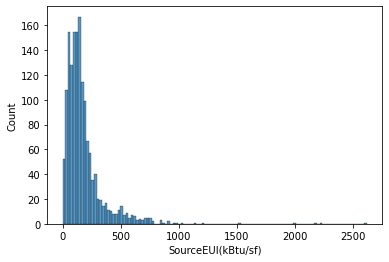

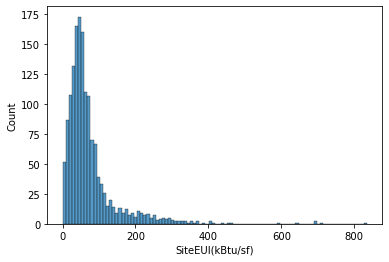

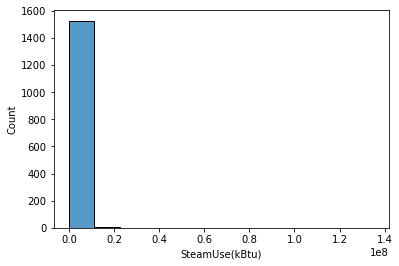

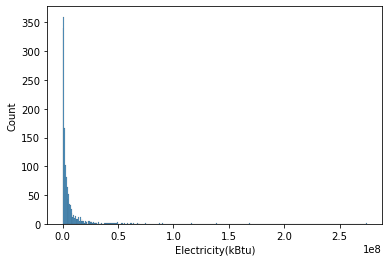

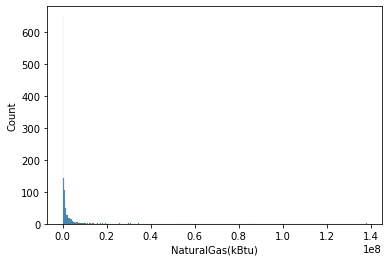

In [32]:
for x in leak :
    sns.histplot(data=df1, x=x)
    plt.show()

Les variables relatives aux relevés n'ont pas des distributions gaussiennes. Ils seraient intéressante de leur appliquer une transformation en log

### Valeurs aberrantes

In [33]:
df1.describe()

,OSEBuildingID,YearBuilt,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PropertyGFABuilding(s),Latitude,Longitude,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)
count,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1.541000e+03,1541.000000,1541.000000,1541.000000,1541.000000,1.541000e+03,1.541000e+03,1.541000e+03,1541.000000,1.541000e+03
mean,16606.445165,1961.264114,1.036340,4.286178,63.861692,9.727861e+04,47.616181,-122.333411,181.924854,74.283842,4.961126e+05,5.435926e+06,1.673089e+06,165.047690,7.655883e+06
std,13857.503678,32.893724,0.569783,6.793465,23.345148,1.651669e+05,0.046843,0.023223,190.195140,75.604224,5.311245e+06,1.304930e+07,5.509682e+06,571.278724,1.867404e+07
min,1.000000,1900.000000,0.000000,0.000000,1.000000,3.636000e+03,47.509590,-122.411820,0.000000,0.000000,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,0.000000e+00
25%,610.000000,1929.000000,1.000000,1.000000,60.000000,2.769000e+04,47.587720,-122.342740,79.300003,34.299999,0.000000e+00,7.102750e+05,0.000000e+00,19.510000,1.207504e+06
50%,21213.000000,1965.000000,1.000000,2.000000,63.861692,4.508200e+04,47.612400,-122.333160,137.899994,53.200001,0.000000e+00,1.634669e+06,4.366770e+05,48.500000,2.615974e+06
75%,24630.000000,1988.000000,1.000000,4.000000,79.000000,9.279200e+04,47.648680,-122.322590,210.600006,83.800003,0.000000e+00,5.021914e+06,1.413896e+06,137.660000,6.983736e+06
max,50226.000000,2015.000000,9.000000,99.000000,100.000000,1.765970e+06,47.733870,-122.261800,2620.000000,834.400024,1.349435e+08,2.745325e+08,1.381912e+08,12307.160000,2.930908e+08


In [34]:
df1.drop(df1.loc[df1['TotalGHGEmissions'] < 0].index, inplace=True)

In [35]:
df1.describe()

,OSEBuildingID,YearBuilt,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PropertyGFABuilding(s),Latitude,Longitude,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)
count,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1.540000e+03,1540.000000,1540.000000,1540.000000,1540.000000,1.540000e+03,1.540000e+03,1.540000e+03,1540.000000,1.540000e+03
mean,16584.901299,1961.230519,1.036364,4.285065,63.838225,9.730801e+04,47.616182,-122.333425,182.041688,74.327468,4.964348e+05,5.439530e+06,1.674175e+06,165.155383,7.660632e+06
std,13836.165747,32.877953,0.569967,6.795531,23.334544,1.652166e+05,0.046859,0.023225,190.201598,75.609377,5.312955e+06,1.305278e+07,5.511306e+06,571.448647,1.867918e+07
min,1.000000,1900.000000,0.000000,0.000000,1.000000,3.636000e+03,47.509590,-122.411820,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,609.750000,1929.000000,1.000000,1.000000,60.000000,2.768750e+04,47.587708,-122.342765,79.375002,34.375001,0.000000e+00,7.104272e+05,0.000000e+00,19.547500,1.207898e+06
50%,21212.500000,1965.000000,1.000000,2.000000,63.861692,4.507500e+04,47.612380,-122.333160,137.949997,53.250000,0.000000e+00,1.636902e+06,4.368465e+05,48.515000,2.617531e+06
75%,24629.250000,1988.000000,1.000000,4.000000,79.000000,9.284900e+04,47.648715,-122.322612,210.750004,83.800003,0.000000e+00,5.034429e+06,1.414432e+06,137.832500,6.986487e+06
max,50226.000000,2015.000000,9.000000,99.000000,100.000000,1.765970e+06,47.733870,-122.261800,2620.000000,834.400024,1.349435e+08,2.745325e+08,1.381912e+08,12307.160000,2.930908e+08


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 0 to 3375
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   OSEBuildingID           1540 non-null   int64   
 1   YearBuilt               1540 non-null   int64   
 2   BuildingType            1540 non-null   object  
 3   NumberofBuildings       1540 non-null   float64 
 4   NumberofFloors          1540 non-null   int64   
 5   ENERGYSTARScore         1540 non-null   float64 
 6   PrimaryPropertyType     1540 non-null   category
 7   PropertyGFABuilding(s)  1540 non-null   int64   
 8   Neighborhood            1540 non-null   category
 9   Latitude                1540 non-null   float64 
 10  Longitude               1540 non-null   float64 
 11  ComplianceStatus        1540 non-null   object  
 12  SourceEUI(kBtu/sf)      1540 non-null   float64 
 13  SiteEUI(kBtu/sf)        1540 non-null   float64 
 14  SteamUse(kBtu)          

In [37]:
df1.describe()

,OSEBuildingID,YearBuilt,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PropertyGFABuilding(s),Latitude,Longitude,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)
count,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1.540000e+03,1540.000000,1540.000000,1540.000000,1540.000000,1.540000e+03,1.540000e+03,1.540000e+03,1540.000000,1.540000e+03
mean,16584.901299,1961.230519,1.036364,4.285065,63.838225,9.730801e+04,47.616182,-122.333425,182.041688,74.327468,4.964348e+05,5.439530e+06,1.674175e+06,165.155383,7.660632e+06
std,13836.165747,32.877953,0.569967,6.795531,23.334544,1.652166e+05,0.046859,0.023225,190.201598,75.609377,5.312955e+06,1.305278e+07,5.511306e+06,571.448647,1.867918e+07
min,1.000000,1900.000000,0.000000,0.000000,1.000000,3.636000e+03,47.509590,-122.411820,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,609.750000,1929.000000,1.000000,1.000000,60.000000,2.768750e+04,47.587708,-122.342765,79.375002,34.375001,0.000000e+00,7.104272e+05,0.000000e+00,19.547500,1.207898e+06
50%,21212.500000,1965.000000,1.000000,2.000000,63.861692,4.507500e+04,47.612380,-122.333160,137.949997,53.250000,0.000000e+00,1.636902e+06,4.368465e+05,48.515000,2.617531e+06
75%,24629.250000,1988.000000,1.000000,4.000000,79.000000,9.284900e+04,47.648715,-122.322612,210.750004,83.800003,0.000000e+00,5.034429e+06,1.414432e+06,137.832500,6.986487e+06
max,50226.000000,2015.000000,9.000000,99.000000,100.000000,1.765970e+06,47.733870,-122.261800,2620.000000,834.400024,1.349435e+08,2.745325e+08,1.381912e+08,12307.160000,2.930908e+08


In [38]:
df1['TotalGHGEmissions'] = np.log(df1['TotalGHGEmissions']+1)
df1['SiteEnergyUse(kBtu)'] = np.log(df1['SiteEnergyUse(kBtu)']+1)

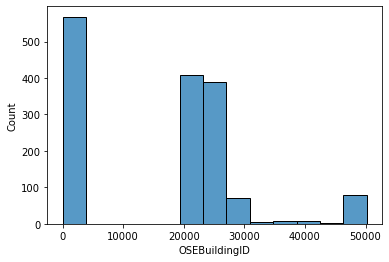

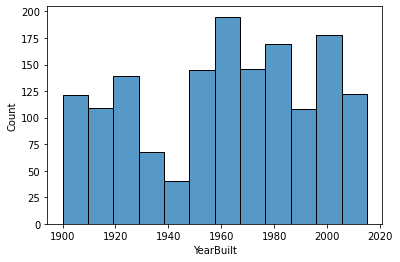

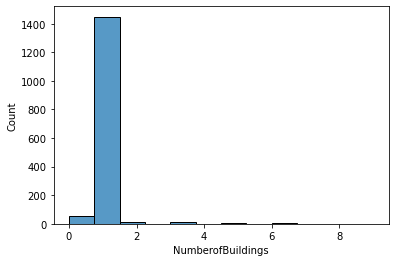

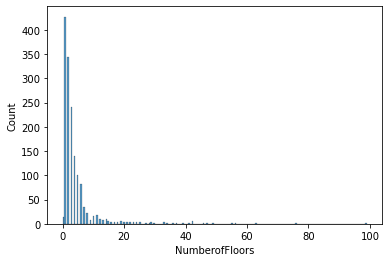

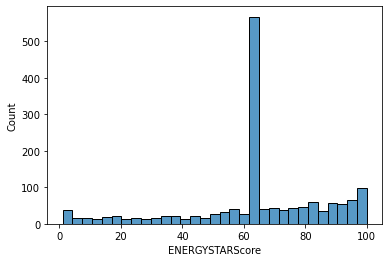

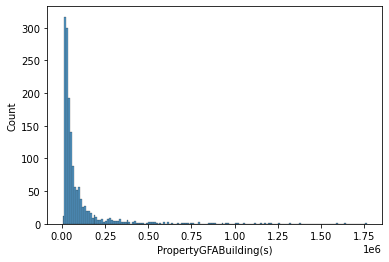

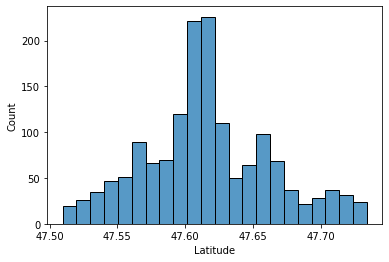

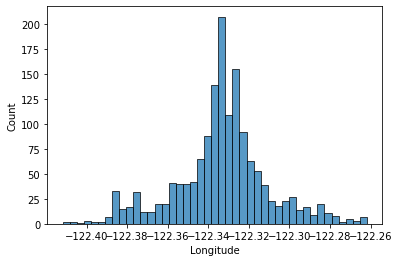

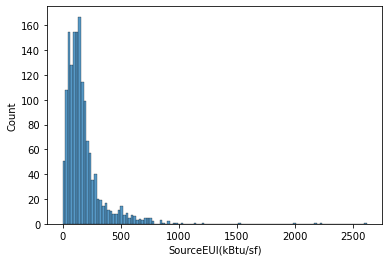

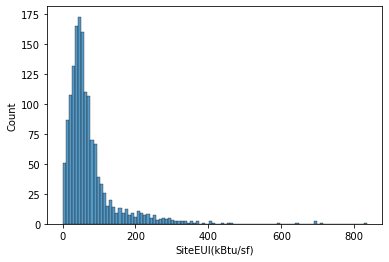

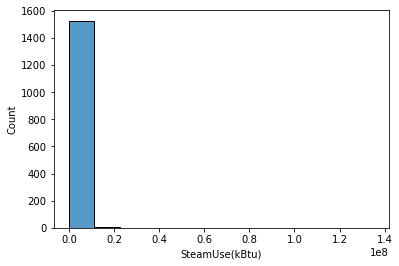

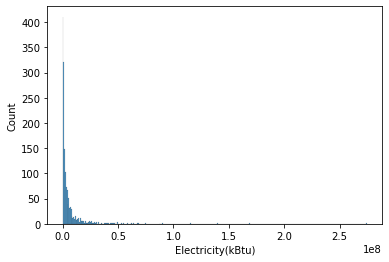

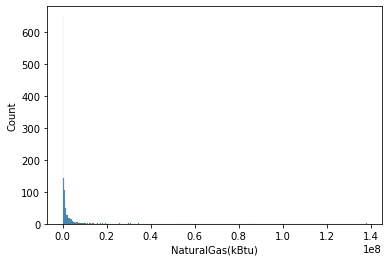

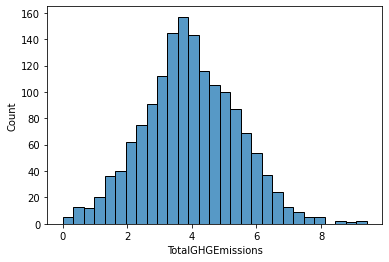

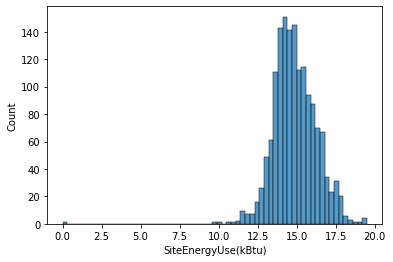

In [39]:
num_var = list(df1.describe().columns)
for x in num_var :
    sns.histplot(data=df1, x=x)
    plt.show()

In [40]:
#proper_mean = df1.groupby('PrimaryPropertyType')[leak+target_1+target_2].mean().add_suffix('_mean_property_type')
temp = np.log1p(df1[leak])
df1[leak] = temp

proper_mean = df1.groupby('PrimaryPropertyType')[leak].mean().add_suffix('_mean_property_type')
df1 = df1.merge(proper_mean, left_on='PrimaryPropertyType', right_index=True)
df1 = df1.drop(leak, axis=1)

In [41]:
df1.columns

Index(['OSEBuildingID', 'YearBuilt', 'BuildingType', 'NumberofBuildings',
       'NumberofFloors', 'ENERGYSTARScore', 'PrimaryPropertyType',
       'PropertyGFABuilding(s)', 'Neighborhood', 'Latitude', 'Longitude',
       'ComplianceStatus', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)',
       'SourceEUI(kBtu/sf)_mean_property_type',
       'SiteEUI(kBtu/sf)_mean_property_type',
       'SteamUse(kBtu)_mean_property_type',
       'Electricity(kBtu)_mean_property_type',
       'NaturalGas(kBtu)_mean_property_type'],
      dtype='object')

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 0 to 3105
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   OSEBuildingID                          1540 non-null   int64   
 1   YearBuilt                              1540 non-null   int64   
 2   BuildingType                           1540 non-null   object  
 3   NumberofBuildings                      1540 non-null   float64 
 4   NumberofFloors                         1540 non-null   int64   
 5   ENERGYSTARScore                        1540 non-null   float64 
 6   PrimaryPropertyType                    1540 non-null   category
 7   PropertyGFABuilding(s)                 1540 non-null   int64   
 8   Neighborhood                           1540 non-null   category
 9   Latitude                               1540 non-null   float64 
 10  Longitude                              1540 non-null   float

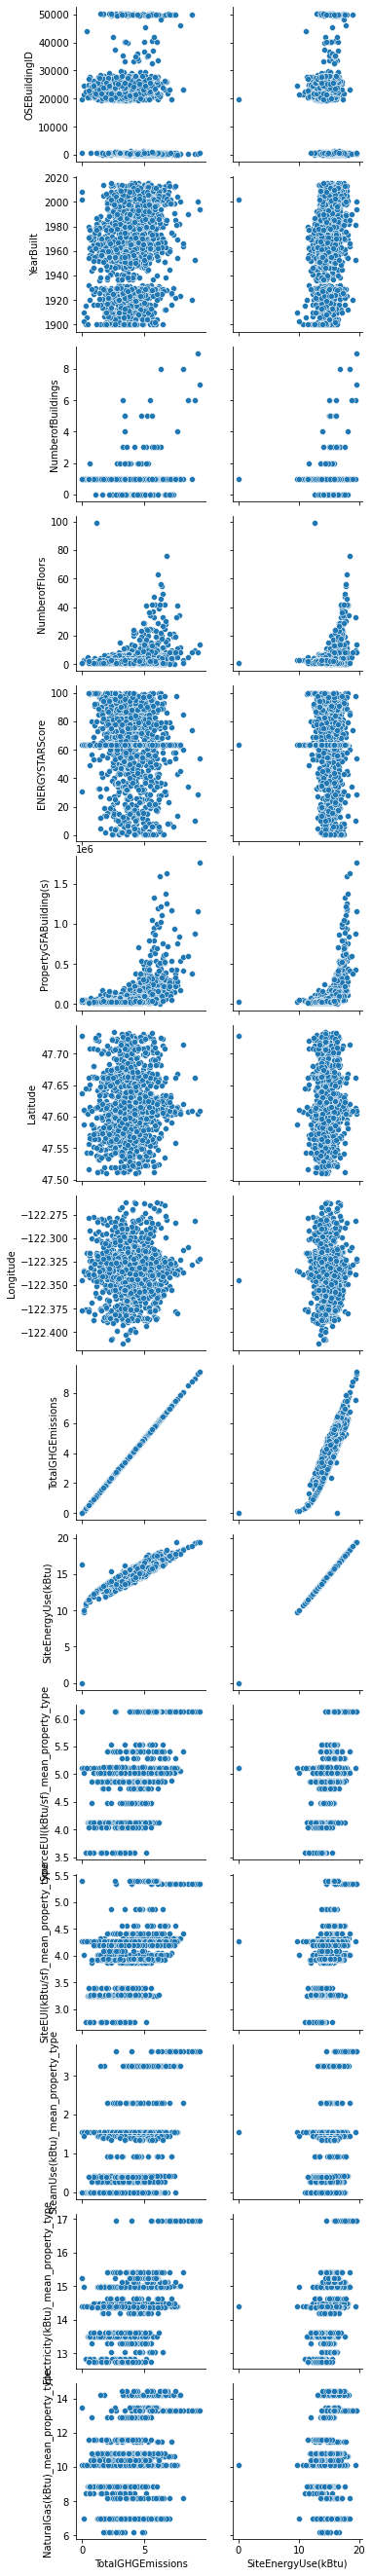

In [43]:
g = sns.PairGrid(data=df1, x_vars=['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], )
g.map(sns.scatterplot)

In [44]:
df1.set_index('OSEBuildingID', inplace=True)

<AxesSubplot:>

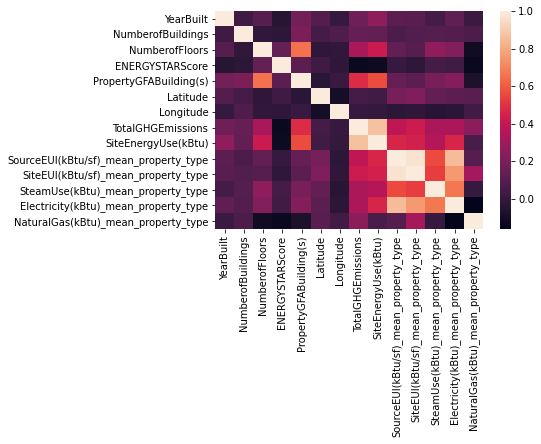

In [45]:
sns.heatmap(df1.corr())

In [46]:
df1.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PropertyGFABuilding(s),Latitude,Longitude,TotalGHGEmissions,SiteEnergyUse(kBtu),SourceEUI(kBtu/sf)_mean_property_type,SiteEUI(kBtu/sf)_mean_property_type,SteamUse(kBtu)_mean_property_type,Electricity(kBtu)_mean_property_type,NaturalGas(kBtu)_mean_property_type
count,1540.000000,1540.000000,1540.000000,1540.000000,1.540000e+03,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000
mean,1961.230519,1.036364,4.285065,63.838225,9.730801e+04,47.616182,-122.333425,3.958613,14.888098,4.859667,3.983458,1.047281,14.415170,9.571629
std,32.877953,0.569967,6.795531,23.334544,1.652166e+05,0.046859,0.023225,1.453374,1.375273,0.499001,0.487324,0.898867,0.767402,2.232325
min,1900.000000,0.000000,0.000000,1.000000,3.636000e+03,47.509590,-122.411820,0.000000,0.000000,3.580240,2.753690,0.000000,12.742502,6.220422
25%,1929.000000,1.000000,1.000000,60.000000,2.768750e+04,47.587708,-122.342765,3.022739,14.004393,4.749691,3.931269,0.273111,13.624607,7.016811
50%,1965.000000,1.000000,2.000000,63.861692,4.507500e+04,47.612380,-122.333160,3.902276,14.777742,5.026972,4.019540,1.442825,14.472564,10.123289
75%,1988.000000,1.000000,4.000000,79.000000,9.284900e+04,47.648715,-122.322612,4.933266,15.759488,5.058509,4.271479,1.442825,14.967206,10.814406
max,2015.000000,9.000000,99.000000,100.000000,1.765970e+06,47.733870,-122.261800,9.418018,19.495993,6.133918,5.389167,3.635655,16.939583,14.455184


In [47]:
df1.to_csv('df2.csv')

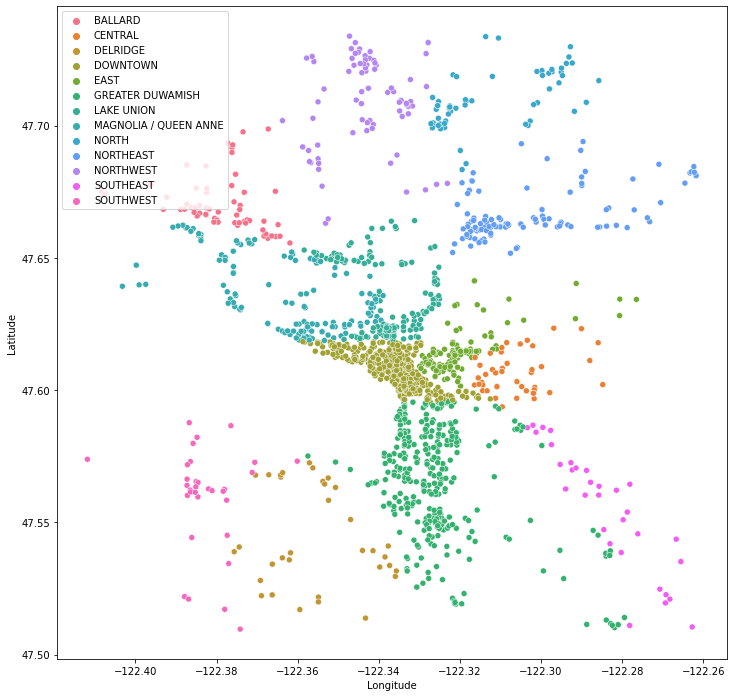

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches((12,12))

ax = sns.scatterplot(data=df1, y='Latitude', x='Longitude', hue='Neighborhood')
plt.legend(loc=2)